# Задание 1. Исследование набора данных
В ходе выполнения данного задания выбирается набор данных, который будет использоваться в дальнейшем при исследовании алгоритмов кластеризации и классификации. 
Любая задача анализа данных предполагает предобработку и статистический анализ данных, это позволяет в дальнейшем выбрать подходящую модель и алгоритм анализа данных.
Задание состоит из последовательного выполнения следующих подзадач:
1. Создать Jupyter Notebook, переименовать его «Lab 1, № Группы, ФИО»
2. Для каждого датасета представить краткое его описание в вашем Jupyter Notebook: 

  a.	предметная область, источник данных, характер данных (реальные или имитационные)

  b.	какие атрибуты представлены в датасете, их тип (числовой, строковый (категории)), что они обозначают 

  c.	есть ли описание задачи анализа, если есть - представить


3. Для каждого атрибута нужно определить:
  a.	среднее значение, ско
  b.	построить гистограмму распределения значений, определить есть ли выбросы 
  c.	есть ли пропущенные значение, сколько
  d.	предложить вариант обработки пропущенных значений
4. Определить корреляцию между параметрами
  a.	какие атрибуты высококоррелированы, определить характер корреляции 
  b.	какие атрибуты не имеют корреляцию
  c.	постройте графики рассеивания (предпочтительнее матрицу графиков рассеивания)
  d.	проанализируйте полученные результаты.

### Датасет
Выбран датасет с https://www.kaggle.com/datasets - "penguins".

Данные были собраны и предоставлены доктором Кристен Горман и станцией Палмер, Антарктический фильтр, членом Сети долгосрочных экологических исследований.

### Название и описание столбца
species Фактор, обозначающий виды пингвинов (Адели, Чинстрап и Генту)

island Фактор, обозначающий остров в архипелаге Палмер, Антарктида (Бискоу, Дрим или Торгерсен)

bill_length_mm Число, обозначающее длину клюва (миллиметры)

bill_depth_mm Число, обозначающее глубину клюва (миллиметры)

flipper_length_mm Целое число, обозначающее длину ласты (миллиметры)

body_mass_g Целое число, обозначающее массу тела (граммы)

sex: секс (мужчина, женщина)

year A number - число, обозначающее год сбора данных.

### Задача
Классифицировать пингвина (его вид) по остальным признакам.

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Посмотрим на содержимое датасета, какие в нем данные, их структуру и есть ли пропуски.

Всего 8 признаков, 3 из которых - категориальные и при дальнейшем анализе нуждаются в кодировке. Остальные - численные, имеются пропуски **NaN**.

Структура простая, без двойных индексов.

In [2]:
from pandas.io.pytables import IndexCol
penguins_df = pd.read_csv("./penguins.csv", index_col=0).dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
#получение числового представления
penguins_df['species'] = pd.factorize(penguins_df['species'])[0]
penguins_df['island'] = pd.factorize(penguins_df['island'])[0]
penguins_df['sex'] = pd.factorize(penguins_df['sex'])[0]

In [4]:
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
1,0,0,39.1,18.7,181.0,3750.0,0,2007
2,0,0,39.5,17.4,186.0,3800.0,1,2007
3,0,0,40.3,18.0,195.0,3250.0,1,2007
5,0,0,36.7,19.3,193.0,3450.0,1,2007
6,0,0,39.3,20.6,190.0,3650.0,0,2007


Посчитаем среднее начение для каждого столбца

In [5]:
for i, col_mean in enumerate(penguins_df.mean()):
  print(f'Для столбца {penguins_df.columns[i]} среднее значение={round(col_mean, 3)}')

Для столбца species среднее значение=0.766
Для столбца island среднее значение=1.228
Для столбца bill_length_mm среднее значение=43.993
Для столбца bill_depth_mm среднее значение=17.165
Для столбца flipper_length_mm среднее значение=200.967
Для столбца body_mass_g среднее значение=4207.057
Для столбца sex среднее значение=0.495
Для столбца year среднее значение=2008.042


In [6]:
for i, col_mean in enumerate(penguins_df.std()):
  print(f'Для столбца {penguins_df.columns[i]} СКО={round(col_mean, 3)}')

Для столбца species СКО=0.768
Для столбца island СКО=0.678
Для столбца bill_length_mm СКО=5.469
Для столбца bill_depth_mm СКО=1.969
Для столбца flipper_length_mm СКО=14.016
Для столбца body_mass_g СКО=805.216
Для столбца sex СКО=0.501
Для столбца year СКО=0.813


Распредление всех величин можно посмотреть по гистограммам

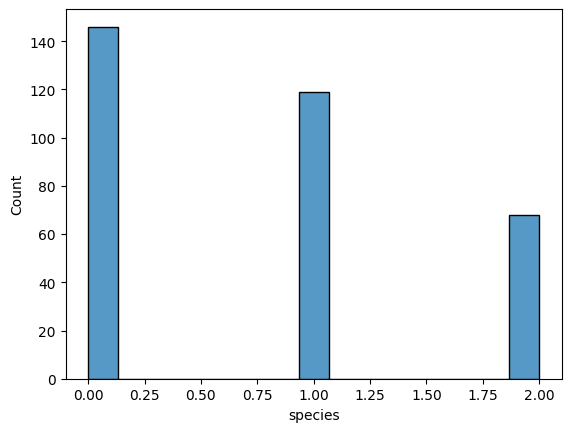

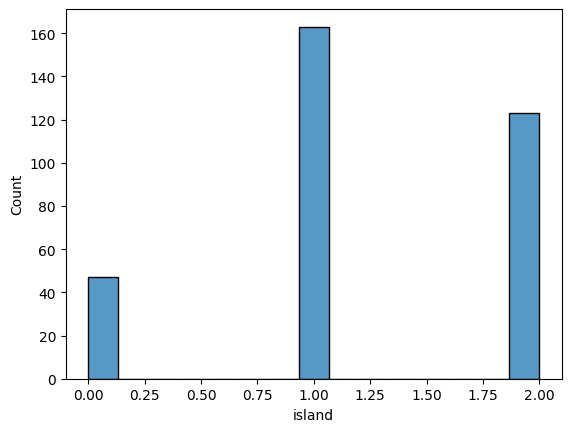

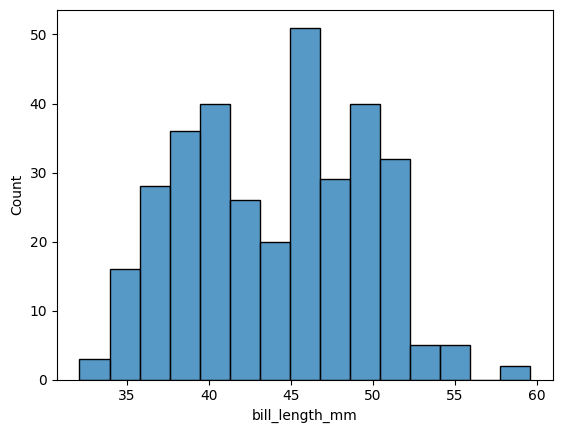

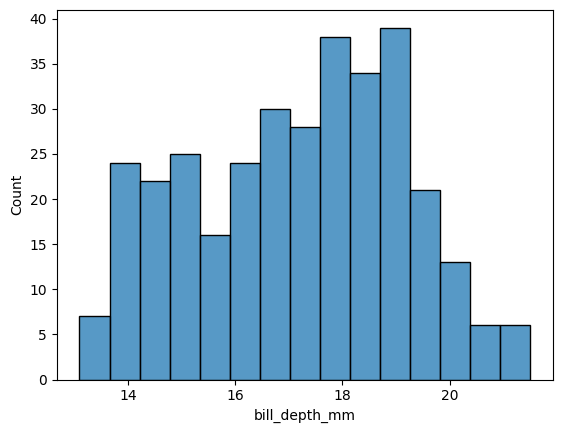

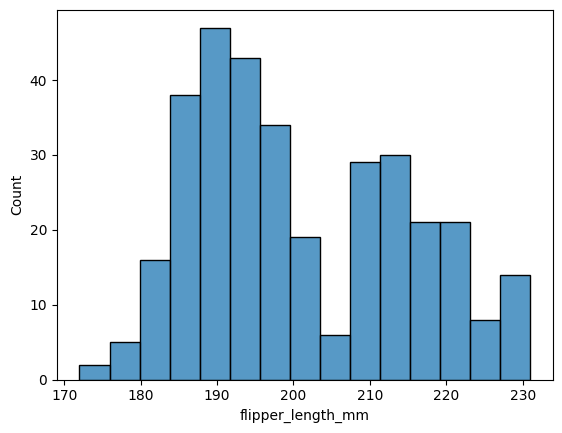

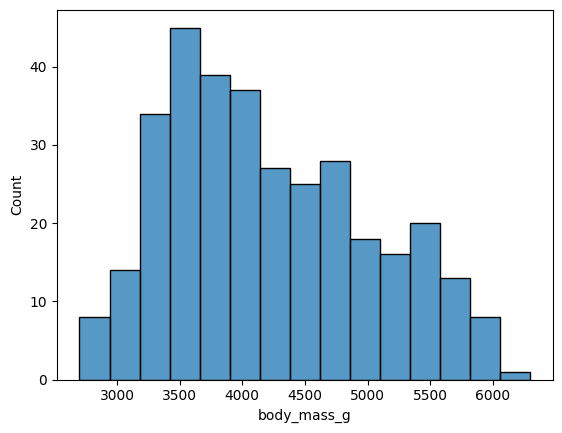

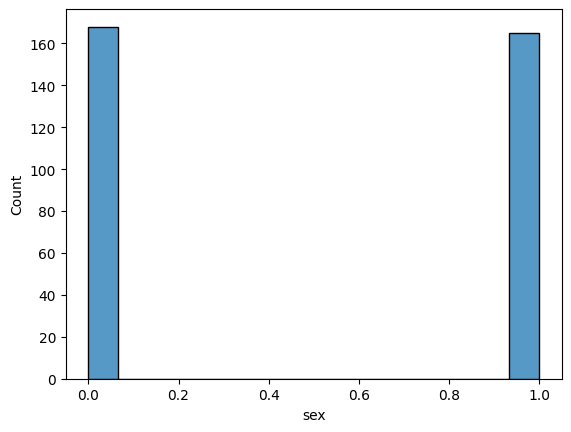

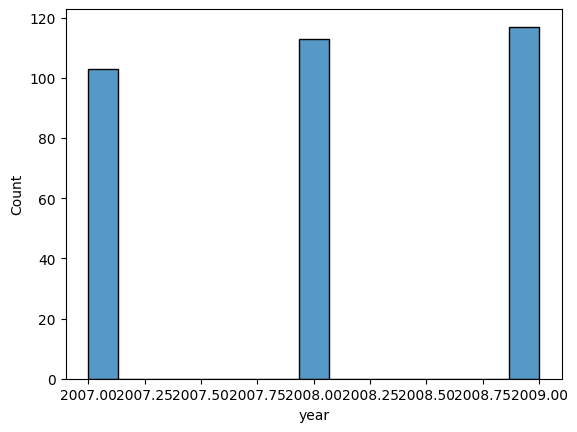

In [7]:
for col in penguins_df.columns:
  sns.histplot(data=penguins_df, x=col, bins=15)
  plt.show()

В данном случаи были удалены строки, содержащие пропуски, но можно было их заменить на медианные или средние значения, но, пнапример, для атрибута *Остров* это невозможно, поэтому использован метод *dropna()* без дополнительных аргументов.

Так же можно нгалядно увидеть разбиение данных на классы по виду с помощью **pairplot**.



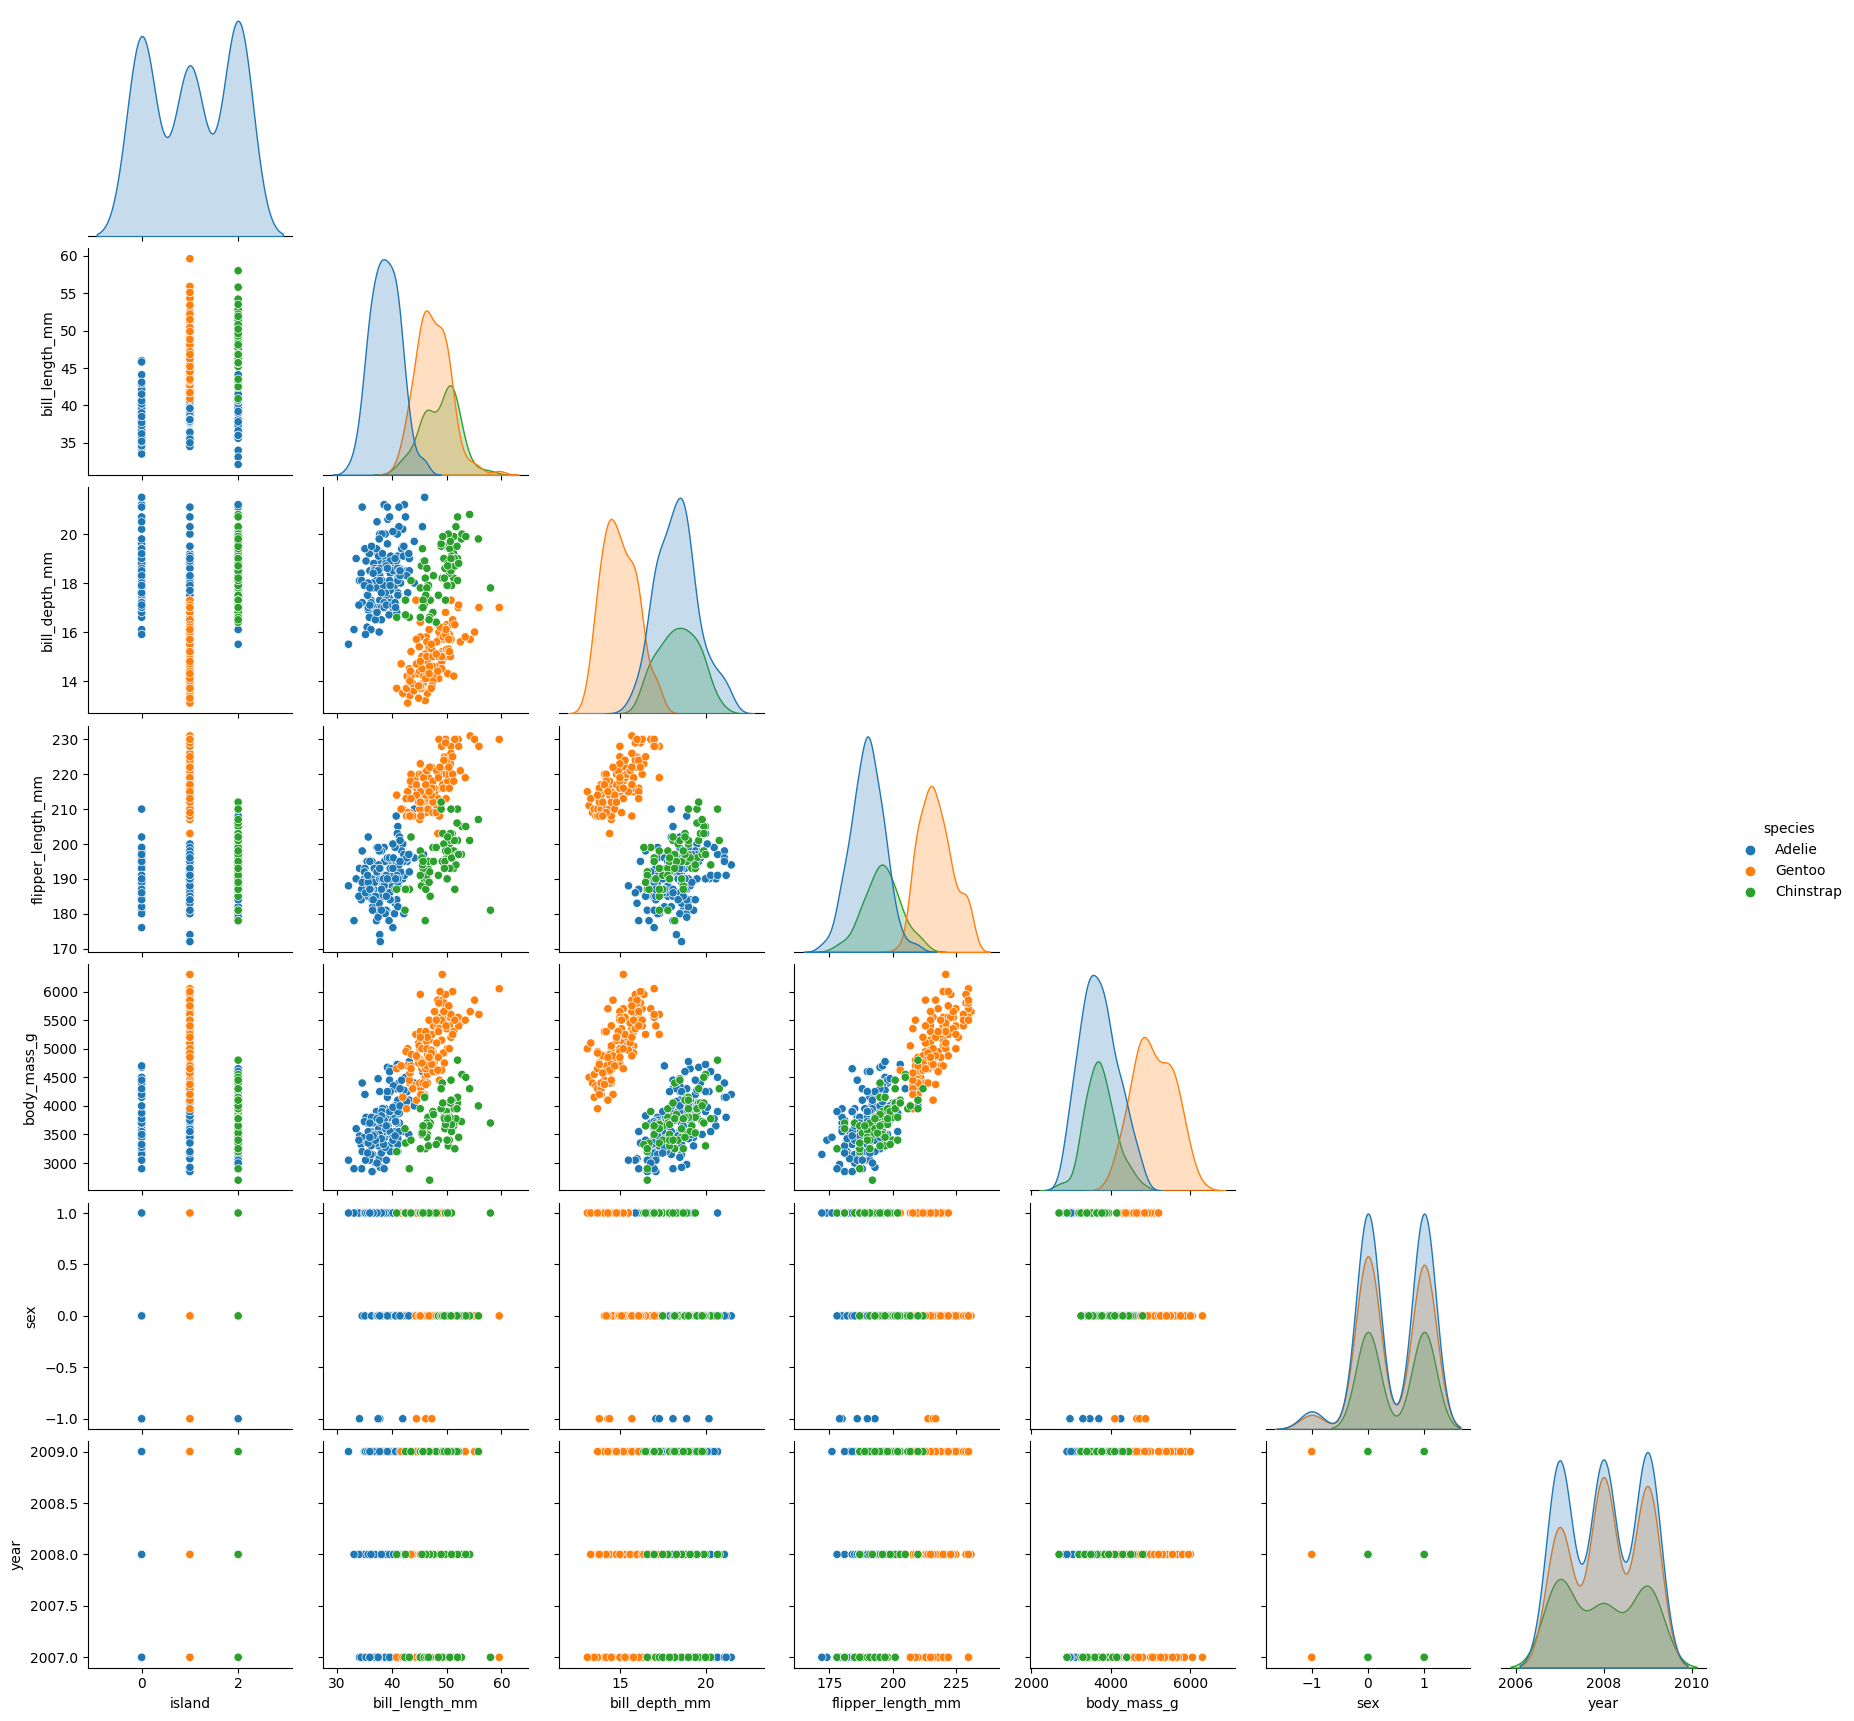

In [15]:
original_penguins_df = pd.read_csv("./penguins.csv", index_col=0)
original_penguins_df['island'] = pd.factorize(original_penguins_df['island'])[0]
original_penguins_df['sex'] = pd.factorize(original_penguins_df['sex'])[0]
sns.pairplot(original_penguins_df,hue='species', corner=True)

По графкам можно увидель, что разные виды пингвинов хорошо выделяются во многих ячейках с числовыми признаками, например, на графике зависимости длины ласты от длины клюва. Однако, часто можно аметить, что пингвины вида Adelie и Chinstap сливаются между собой, например, на графике зависимости массы тела и глубины клюва.

Проверим корреляции артибутов между собой. Код ниже попарно считаем коэффицент корреляции пирсона в квадрате и если он больше 0.7 строит график и выводит значение корреляции.

In [17]:
strong_corr = []
for col1 in penguins_df.columns:
  for col2 in penguins_df.columns:
    if col1 == col2:
      continue
    corrcoef = (np.corrcoef(penguins_df[col1], penguins_df[col2])[0][1])**2
    if corrcoef >= 0.4:
      if not [col2, col1] in strong_corr:
        print(f'Для {col1} и {col2}: {round(corrcoef, 3)}')
        strong_corr.append([col1, col2])

Для species и bill_length_mm: 0.604
Для bill_length_mm и flipper_length_mm: 0.427
Для flipper_length_mm и body_mass_g: 0.762


Коррелиции положительные

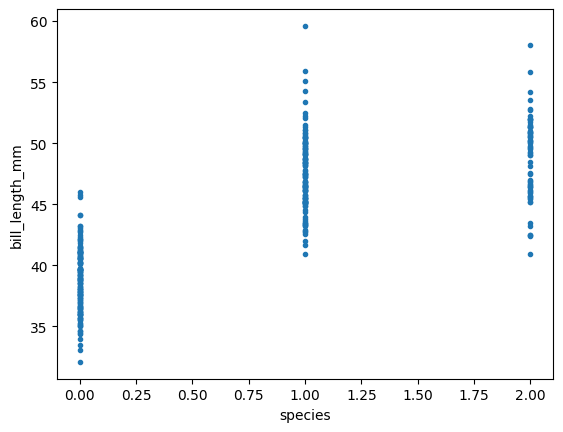

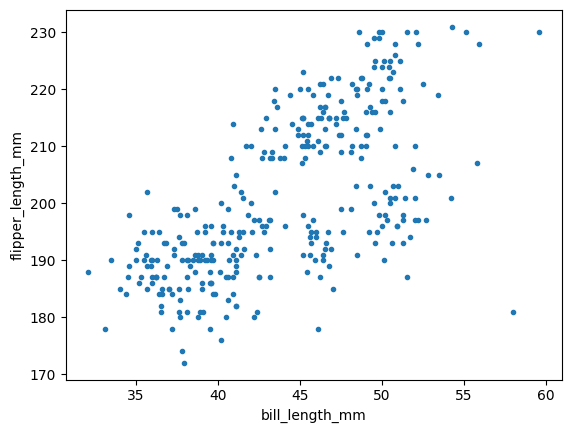

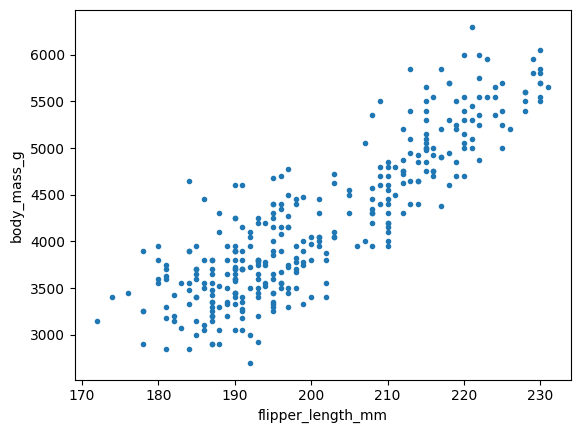

In [10]:
for corr in strong_corr:
  plt.plot(penguins_df[corr[0]], penguins_df[corr[1]], '.')
  plt.xlabel(corr[0])
  plt.ylabel(corr[1])
  plt.show()

Выведем атрибуты со слабой корреляцией.

In [12]:
weak_corr = []
for col1 in penguins_df.columns:
  for col2 in penguins_df.columns:
    if col1 == col2:
      continue
    corrcoef = (np.corrcoef(penguins_df[col1], penguins_df[col2])[0][1])**2
    if corrcoef <= 0.05:
      if not [col2, col1] in strong_corr:
        print(f'Для {col1} и {col2}: {round(corrcoef, 3)}')
        weak_corr.append([col1, col2])

Для species и bill_depth_mm: 0.03
Для species и body_mass_g: 0.04
Для species и sex: 0.0
Для species и year: 0.001
Для island и bill_length_mm: 0.045
Для island и bill_depth_mm: 0.036
Для island и flipper_length_mm: 0.026
Для island и body_mass_g: 0.041
Для island и sex: 0.0
Для island и year: 0.001
Для bill_length_mm и island: 0.045
Для bill_length_mm и year: 0.001
Для bill_depth_mm и species: 0.03
Для bill_depth_mm и island: 0.036
Для bill_depth_mm и year: 0.002
Для flipper_length_mm и island: 0.026
Для flipper_length_mm и year: 0.023
Для body_mass_g и species: 0.04
Для body_mass_g и island: 0.041
Для body_mass_g и year: 0.0
Для sex и species: 0.0
Для sex и island: 0.0
Для sex и year: 0.0
Для year и species: 0.001
Для year и island: 0.001
Для year и bill_length_mm: 0.001
Для year и bill_depth_mm: 0.002
Для year и flipper_length_mm: 0.023
Для year и body_mass_g: 0.0
Для year и sex: 0.0
